# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
#Para iniciar, vamos importar todas as bibiliotecas que iremos utilizar.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas que serão utilizadas na predição dos dados.

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [4]:
df = pd.read_csv('demo01_dummies.csv', sep=',')

In [5]:
#O uso o head e o info paravai visualizar a minha base de dados e o tipo de dado de cada variável.

df.head()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,True,False,False,False,False,True,False,False,False,False
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,False,False,True,False,False,True,False,False,False,False
2,2,0,46.224658,2.106849,1,1,1,1,2.0,False,...,True,False,False,False,False,True,False,False,False,False
3,3,0,29.230137,3.021918,1,0,0,0,2.0,False,...,True,False,False,False,False,True,False,False,False,False
4,4,0,27.482192,4.024658,1,0,1,0,2.0,False,...,True,False,False,False,False,True,False,False,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              6770 non-null   int64  
 1   qtd_filhos                              6770 non-null   int64  
 2   idade                                   6770 non-null   float64
 3   tempo_emprego                           6770 non-null   float64
 4   possui_celular                          6770 non-null   int64  
 5   possui_fone_comercial                   6770 non-null   int64  
 6   possui_fone                             6770 non-null   int64  
 7   possui_email                            6770 non-null   int64  
 8   qt_pessoas_residencia                   6770 non-null   float64
 9   mau                                     6770 non-null   bool   
 10  sexo_M                                  6770 non-null   bool

In [7]:
## Na variável y coloco a variável resposta, mau. 
#Na variável X coloco as demais variáveis explicativas.

y = df.mau

In [8]:
X = df.drop('mau', axis=1)

In [10]:
#Apos separar a minha variável resposta das variáveis explicativas, eu separo a base de dados em duas, treino e teste.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [11]:
X_train.shape

(4739, 33)

In [12]:
X_test.shape

(2031, 33)

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [13]:
#Inicio o treinamento do modelo com os dados separados para treinamento.

clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train, y_train)

In [14]:
predict = clf.predict(X_test)

In [15]:
predict_1 = clf.predict(X_train)

[Text(0.6701998339658444, 0.9772727272727273, 'Unnamed: 0 <= 6630.0\ngini = 0.085\nsamples = 4739\nvalue = [4528, 211]\nclass = Bom'),
 Text(0.6651397454142948, 0.9318181818181818, 'tempo_emprego <= 4.955\ngini = 0.05\nsamples = 4646\nvalue = [4528, 118]\nclass = Bom'),
 Text(0.6676697896900696, 0.9545454545454546, 'True  '),
 Text(0.4518402118912081, 0.8863636363636364, 'Unnamed: 0 <= 5031.5\ngini = 0.062\nsamples = 2540\nvalue = [2458, 82]\nclass = Bom'),
 Text(0.32516998734977864, 0.8409090909090909, 'estado_civil_Widow <= 0.5\ngini = 0.048\nsamples = 1921\nvalue = [1874, 47]\nclass = Bom'),
 Text(0.2226043643263757, 0.7954545454545454, 'tipo_renda_Commercial associate <= 0.5\ngini = 0.041\nsamples = 1798\nvalue = [1760, 38]\nclass = Bom'),
 Text(0.13464579380139152, 0.75, 'educacao_Lower secondary <= 0.5\ngini = 0.031\nsamples = 1411\nvalue = [1389, 22]\nclass = Bom'),
 Text(0.0997786211258697, 0.7045454545454546, 'tempo_emprego <= 0.881\ngini = 0.029\nsamples = 1383\nvalue = [1363

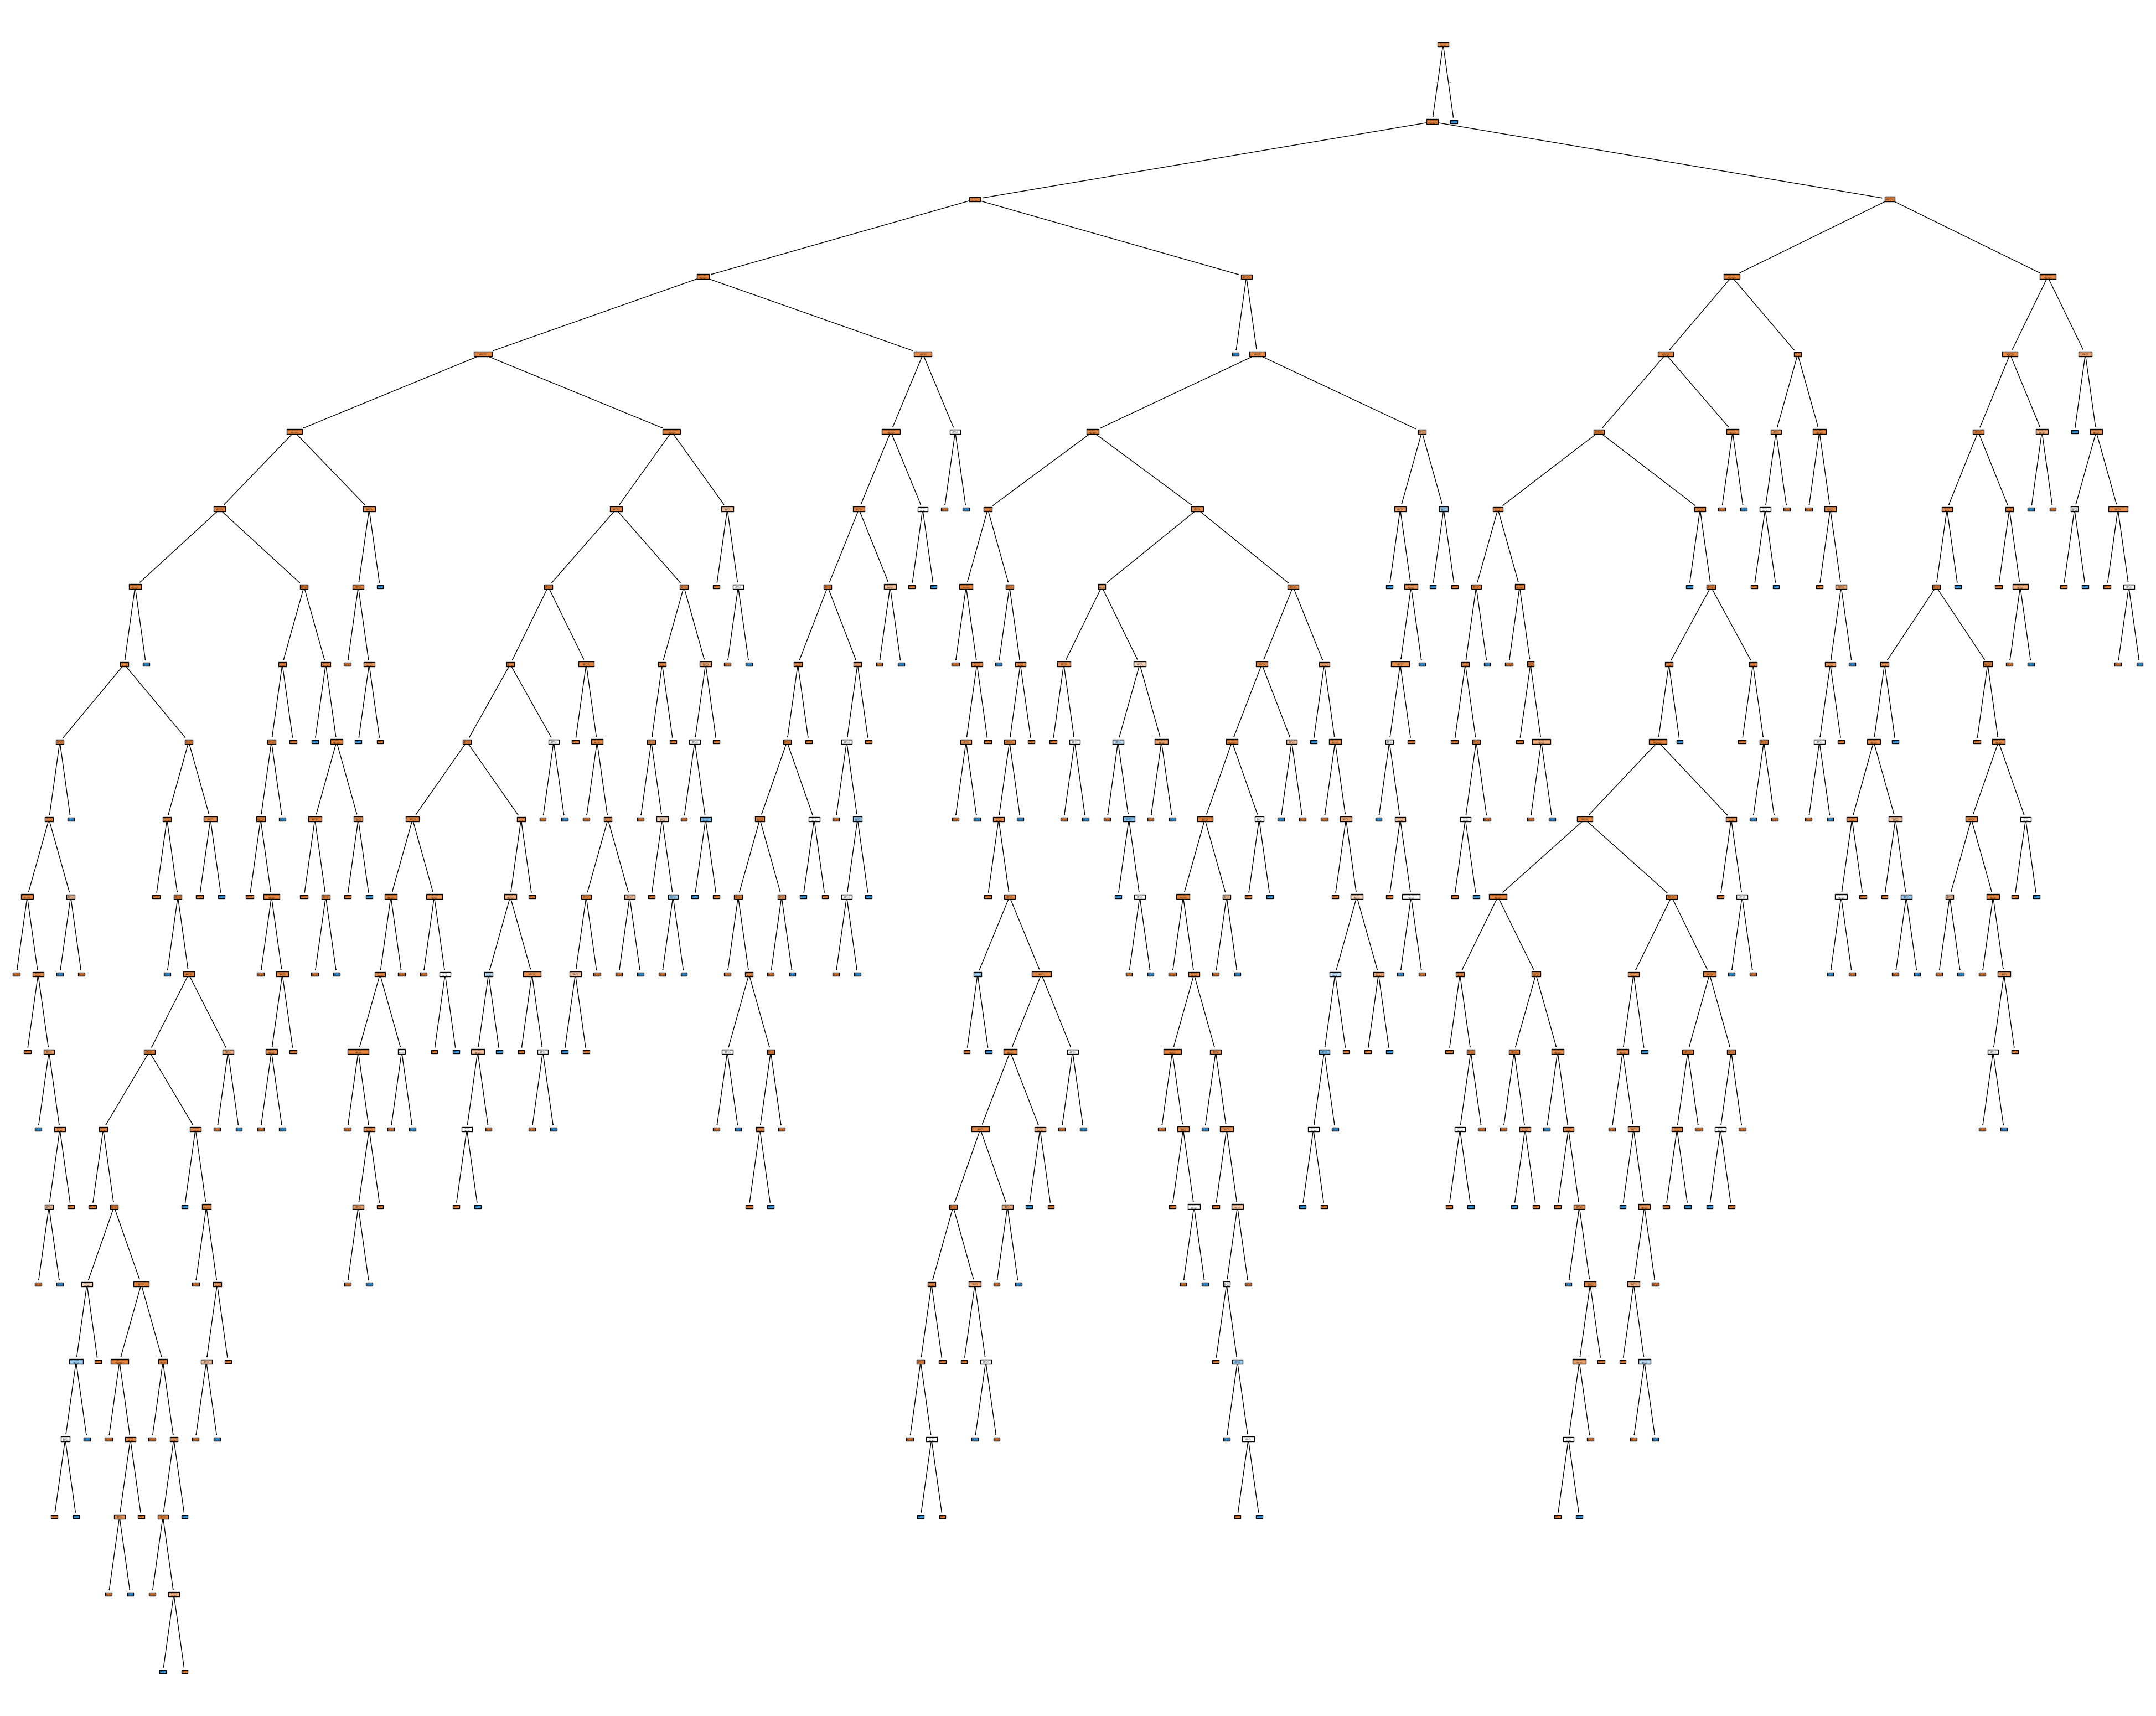

In [16]:
#Fazendo o plot da árvore com todas as variáveis.
#Mesmo com o aumento, o tamanho da figura ainda é muito difícil visualizar as ramificações.

plt.figure(figsize=[50, 40])
plot_tree(clf,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=X.columns)

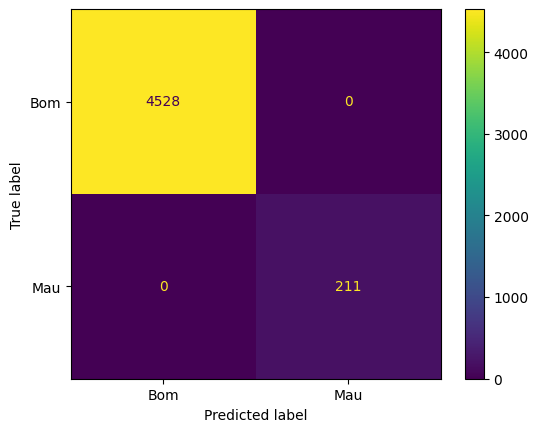

In [17]:
#Abaixo temos a matrix de confusão para os dados de treinamento, como podemos observar ocorreu um overfitting na nossa base, dado que o treinamento acertou 100% dos dados.

ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=['Bom', 'Mau'])
plt.show()

In [18]:
X_train.shape

(4739, 33)

In [21]:
(4528+211)/4739

1.0

In [22]:
#O modelo apresentou acurácia de 100%, ou seja, ele acertou todas as previsões que ele fez, o nos faz pensar fortemente que nosso modelo está overfitting.

accuracy_score(y_train, predict_1)

1.0

#### 3) Vamos avaliar o modelo na base de testes##

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

3.1 
A base de testes pode ser classificada como overfitting. Dado que ela previu com 100% de acurácia os nossos dados.

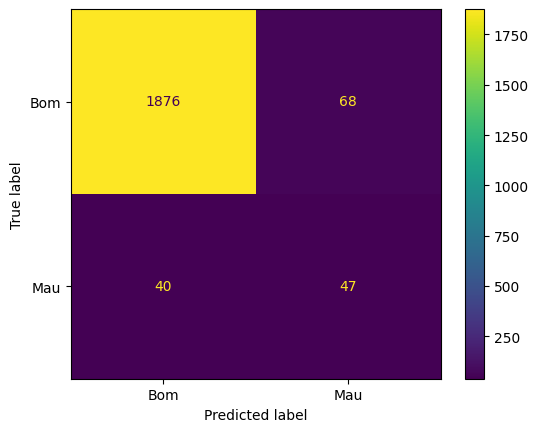

In [23]:
#Fazendo o plot da matrix de confusão para base de teste.

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Bom', 'Mau'])
plt.show()

In [24]:
#O modelo apresentou uma acurácia de quase 100% um valor muito elevado e próximo do valor obtido no treinamento.
#Mesmo não sendo 100% esse valor continua sendo muito elevado.

accuracy_score(y_test, predict)

0.946824224519941

In [25]:
#Realizando a árvore com uma profundidade de 10 e random state de 123

clf = DecisionTreeClassifier(max_depth=10, random_state=123)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9704579025110783

[Text(0.64671875, 0.9545454545454546, 'Unnamed: 0 <= 6630.0\ngini = 0.085\nsamples = 4739\nvalue = [4528, 211]\nclass = Bom'),
 Text(0.6400520833333333, 0.8636363636363636, 'tempo_emprego <= 4.955\ngini = 0.05\nsamples = 4646\nvalue = [4528, 118]\nclass = Bom'),
 Text(0.6433854166666666, 0.9090909090909092, 'True  '),
 Text(0.4109375, 0.7727272727272727, 'Unnamed: 0 <= 5031.5\ngini = 0.062\nsamples = 2540\nvalue = [2458, 82]\nclass = Bom'),
 Text(0.269375, 0.6818181818181818, 'estado_civil_Widow <= 0.5\ngini = 0.048\nsamples = 1921\nvalue = [1874, 47]\nclass = Bom'),
 Text(0.17125, 0.5909090909090909, 'tipo_renda_Commercial associate <= 0.5\ngini = 0.041\nsamples = 1798\nvalue = [1760, 38]\nclass = Bom'),
 Text(0.09333333333333334, 0.5, 'educacao_Lower secondary <= 0.5\ngini = 0.031\nsamples = 1411\nvalue = [1389, 22]\nclass = Bom'),
 Text(0.06, 0.4090909090909091, 'tempo_emprego <= 0.881\ngini = 0.029\nsamples = 1383\nvalue = [1363, 20]\nclass = Bom'),
 Text(0.03333333333333333, 0.318

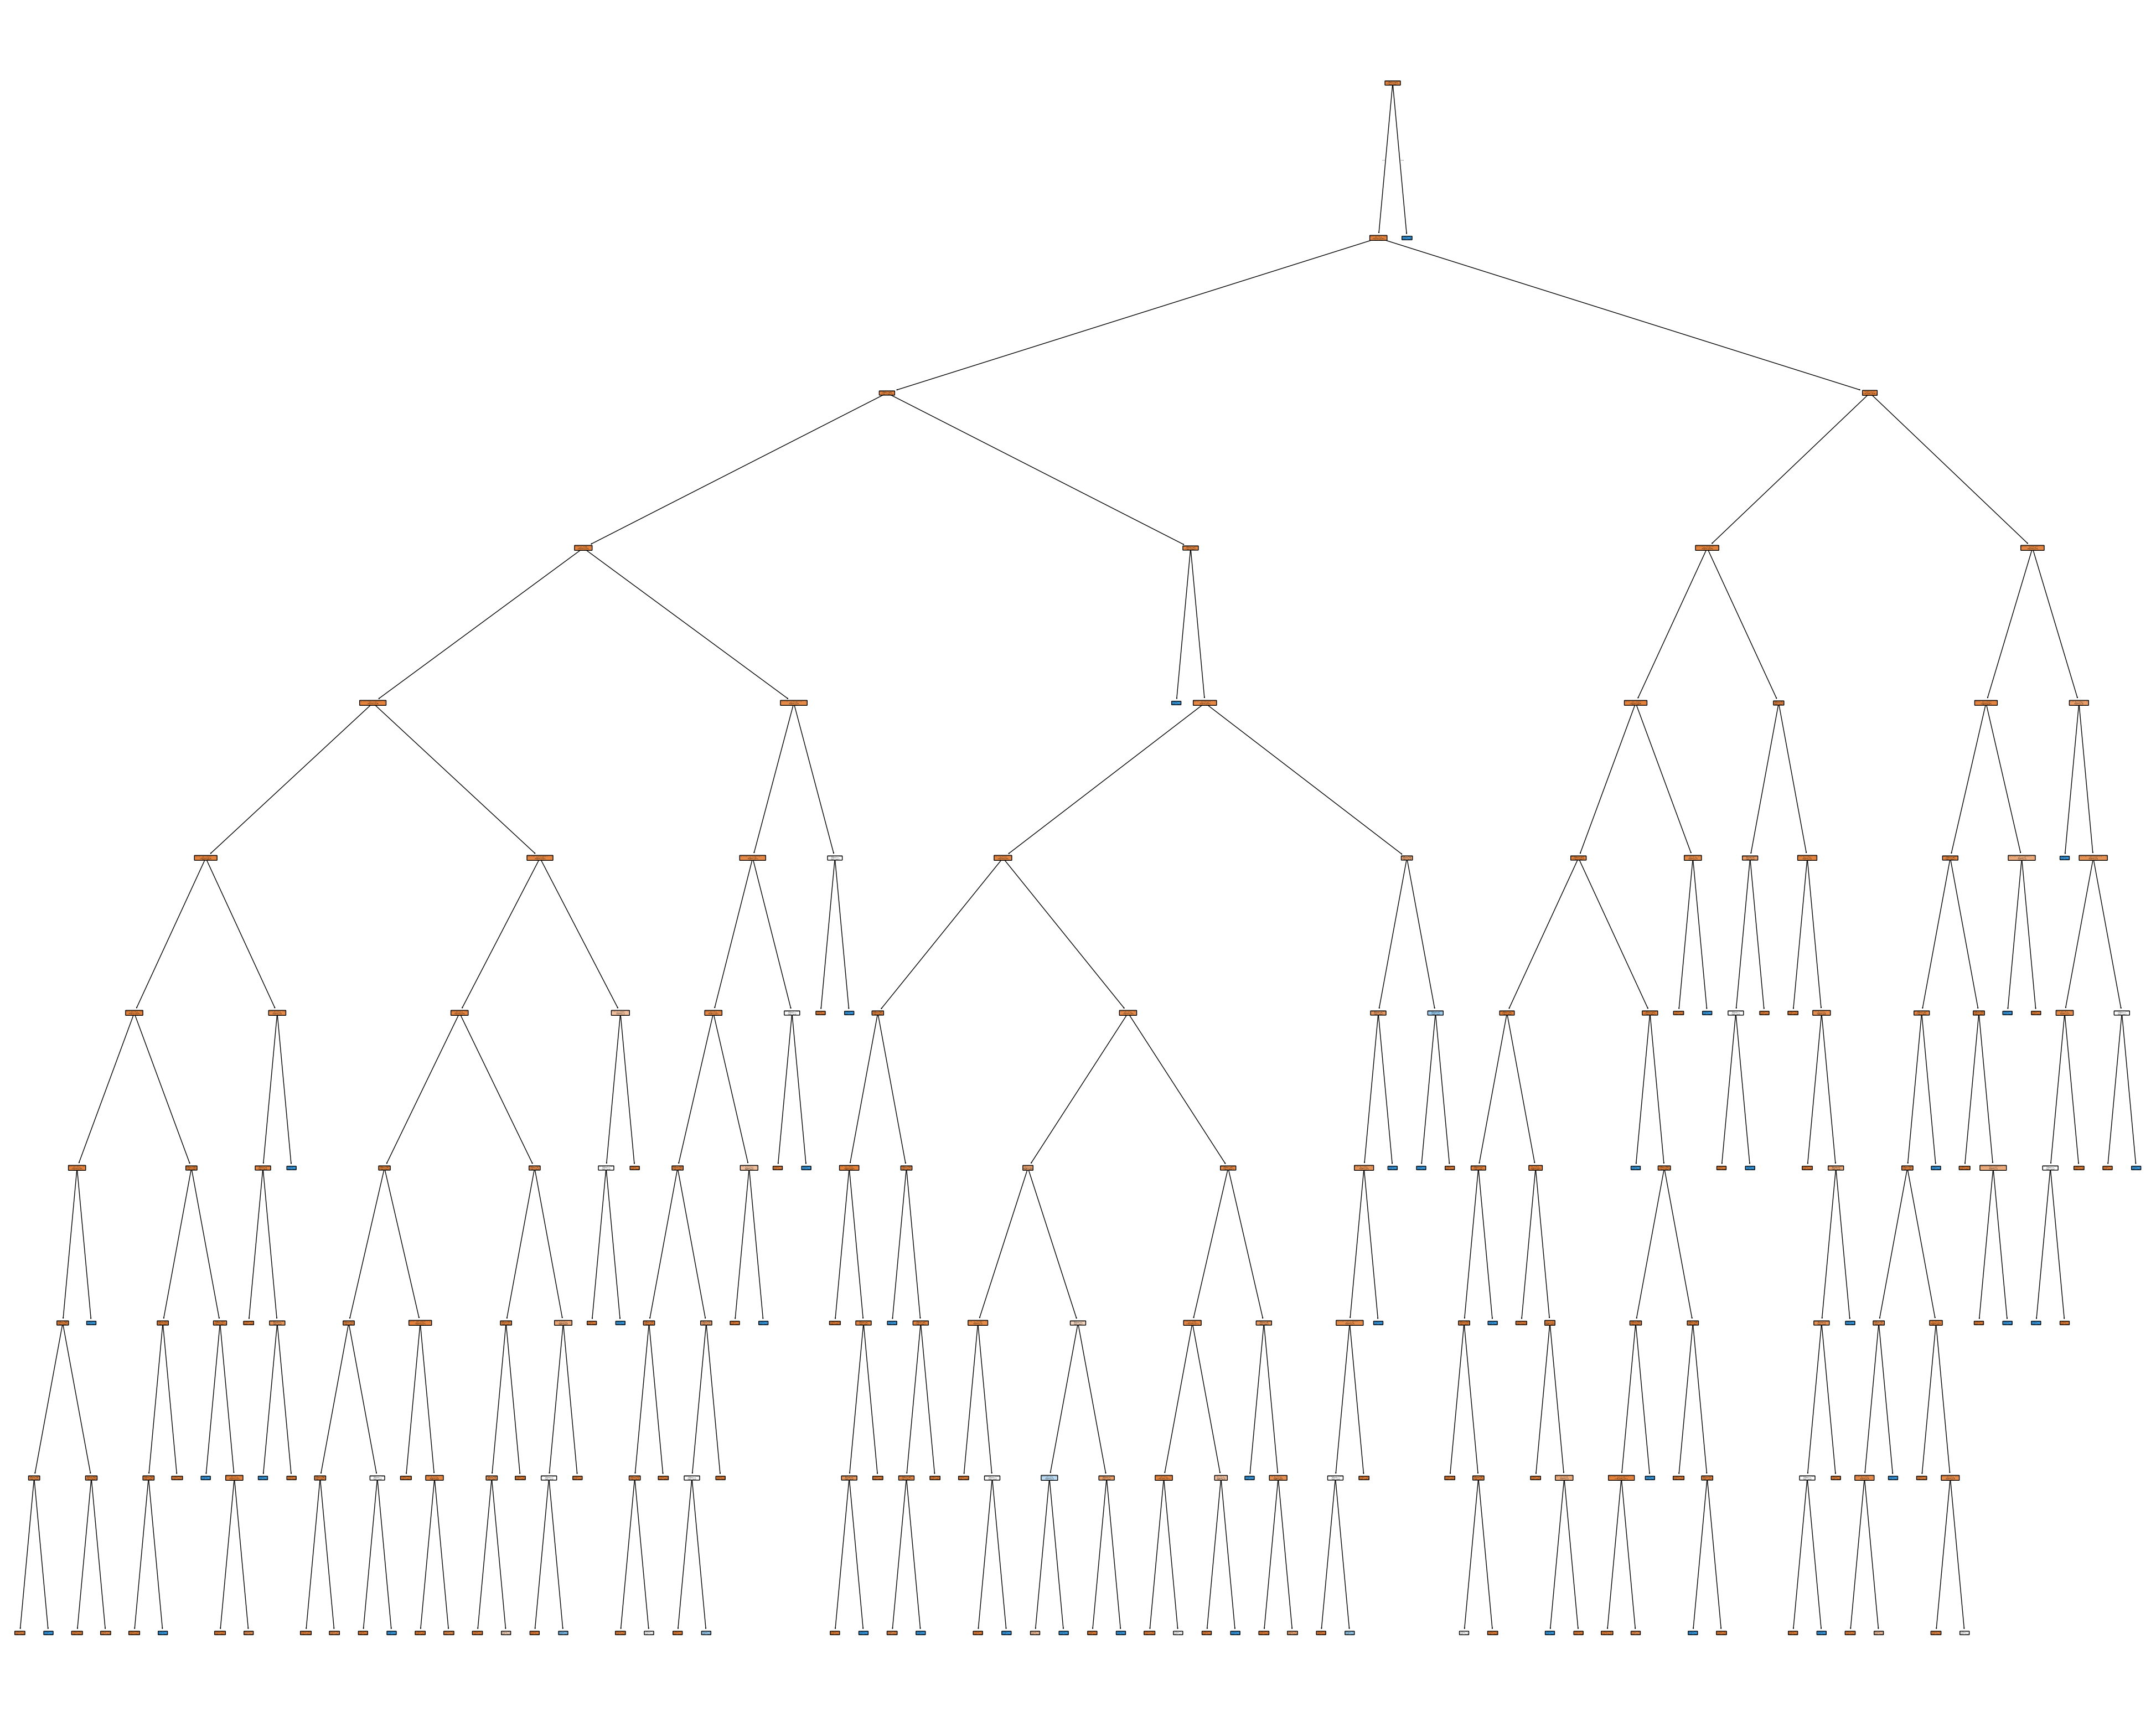

In [26]:
plt.figure(figsize=[50,40])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Bom', 'Mau'],
          feature_names=X_train.columns)

In [27]:
# Agora ploto a árvore com pelo menos 5 folhas e random state de 123

clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9768586903003447

[Text(0.6601718127490039, 0.9736842105263158, 'Unnamed: 0 <= 6630.0\ngini = 0.085\nsamples = 4739\nvalue = [4528, 211]\nclass = Bom'),
 Text(0.6522036852589641, 0.9210526315789473, 'tempo_emprego <= 4.955\ngini = 0.05\nsamples = 4646\nvalue = [4528, 118]\nclass = Bom'),
 Text(0.656187749003984, 0.9473684210526316, 'True  '),
 Text(0.44135956175298807, 0.868421052631579, 'Unnamed: 0 <= 5031.5\ngini = 0.062\nsamples = 2540\nvalue = [2458, 82]\nclass = Bom'),
 Text(0.30826693227091634, 0.8157894736842105, 'estado_civil_Widow <= 0.5\ngini = 0.048\nsamples = 1921\nvalue = [1874, 47]\nclass = Bom'),
 Text(0.21812749003984064, 0.7631578947368421, 'tipo_renda_Commercial associate <= 0.5\ngini = 0.041\nsamples = 1798\nvalue = [1760, 38]\nclass = Bom'),
 Text(0.14342629482071714, 0.7105263157894737, 'educacao_Lower secondary <= 0.5\ngini = 0.031\nsamples = 1411\nvalue = [1389, 22]\nclass = Bom'),
 Text(0.10358565737051793, 0.6578947368421053, 'tempo_emprego <= 0.881\ngini = 0.029\nsamples = 1383

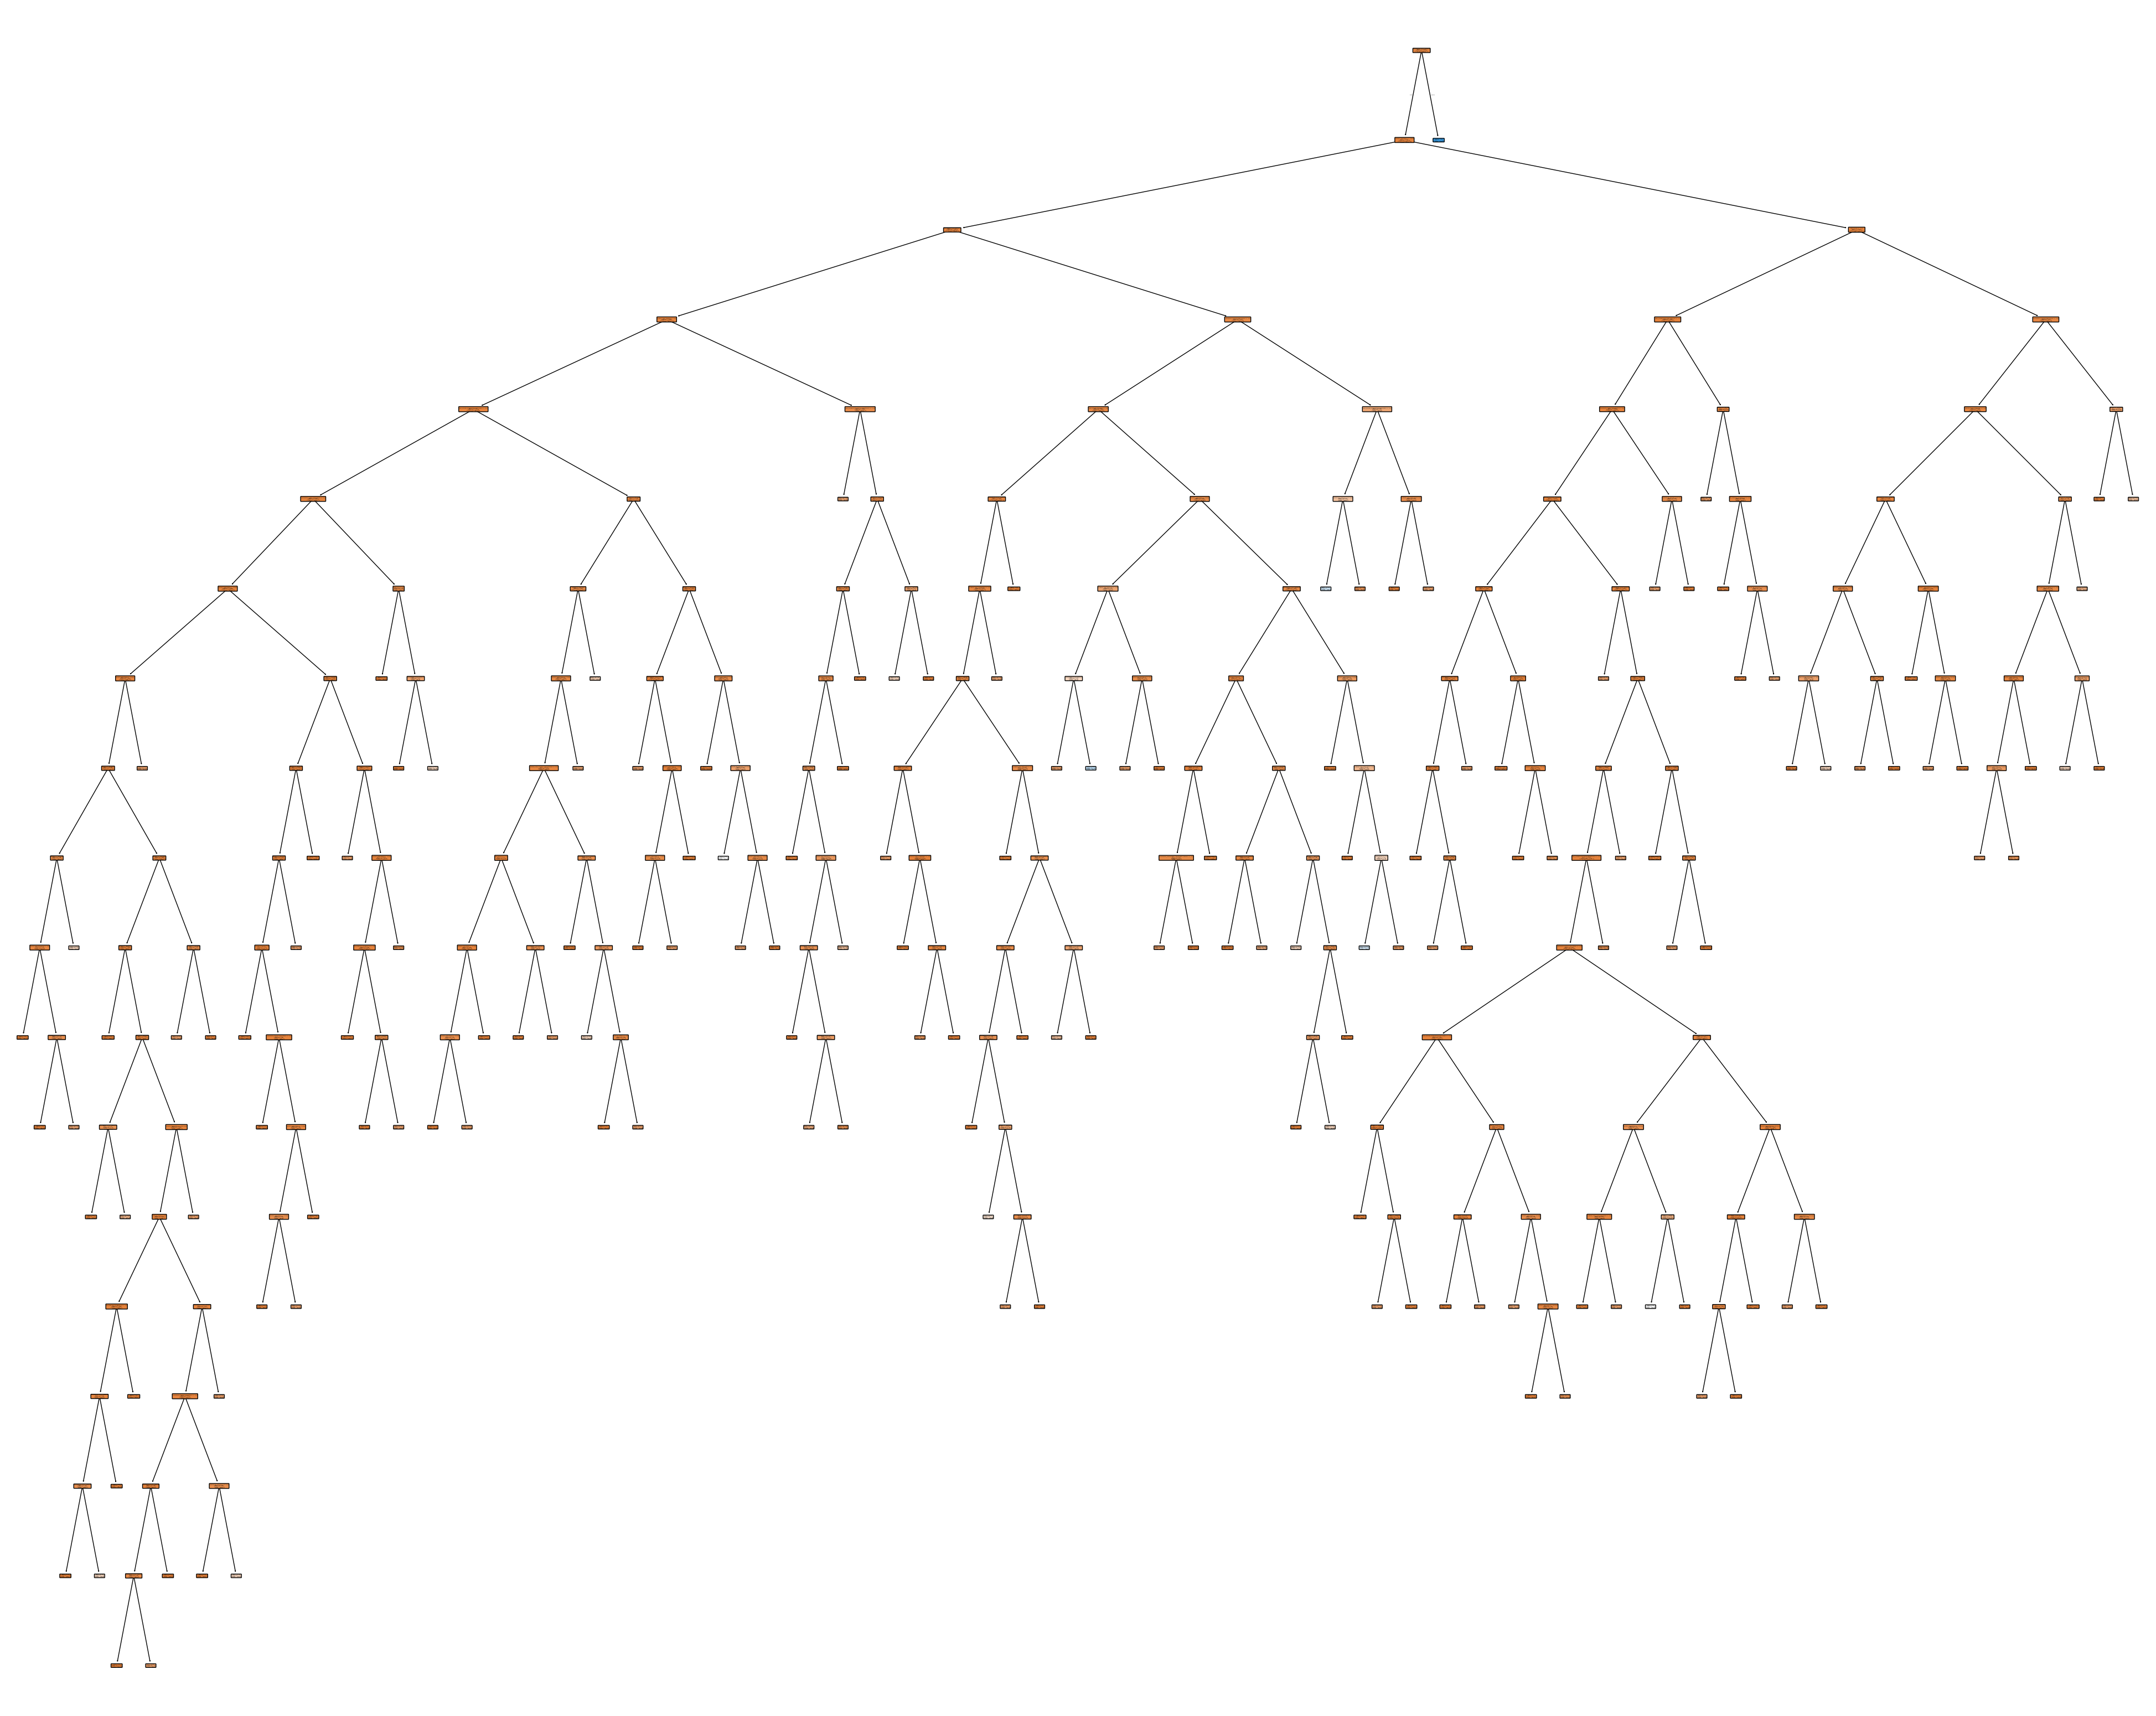

In [28]:
plt.figure(figsize=[50,40])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Bom', 'Mau'],
          feature_names=X_train.columns)

In [29]:
#Agora faço uma combinação de ambas, mínimo de 5 folhas, profundida máxima de 10 e random state de 123.


clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9763663220088626

[Text(0.6328810307017544, 0.9545454545454546, 'Unnamed: 0 <= 6630.0\ngini = 0.085\nsamples = 4739\nvalue = [4528, 211]\nclass = Bom'),
 Text(0.624109100877193, 0.8636363636363636, 'tempo_emprego <= 4.955\ngini = 0.05\nsamples = 4646\nvalue = [4528, 118]\nclass = Bom'),
 Text(0.6284950657894737, 0.9090909090909092, 'True  '),
 Text(0.3989857456140351, 0.7727272727272727, 'Unnamed: 0 <= 5031.5\ngini = 0.062\nsamples = 2540\nvalue = [2458, 82]\nclass = Bom'),
 Text(0.2631578947368421, 0.6818181818181818, 'estado_civil_Widow <= 0.5\ngini = 0.048\nsamples = 1921\nvalue = [1874, 47]\nclass = Bom'),
 Text(0.17543859649122806, 0.5909090909090909, 'tipo_renda_Commercial associate <= 0.5\ngini = 0.041\nsamples = 1798\nvalue = [1760, 38]\nclass = Bom'),
 Text(0.11403508771929824, 0.5, 'educacao_Lower secondary <= 0.5\ngini = 0.031\nsamples = 1411\nvalue = [1389, 22]\nclass = Bom'),
 Text(0.07894736842105263, 0.4090909090909091, 'tempo_emprego <= 0.881\ngini = 0.029\nsamples = 1383\nvalue = [1363,

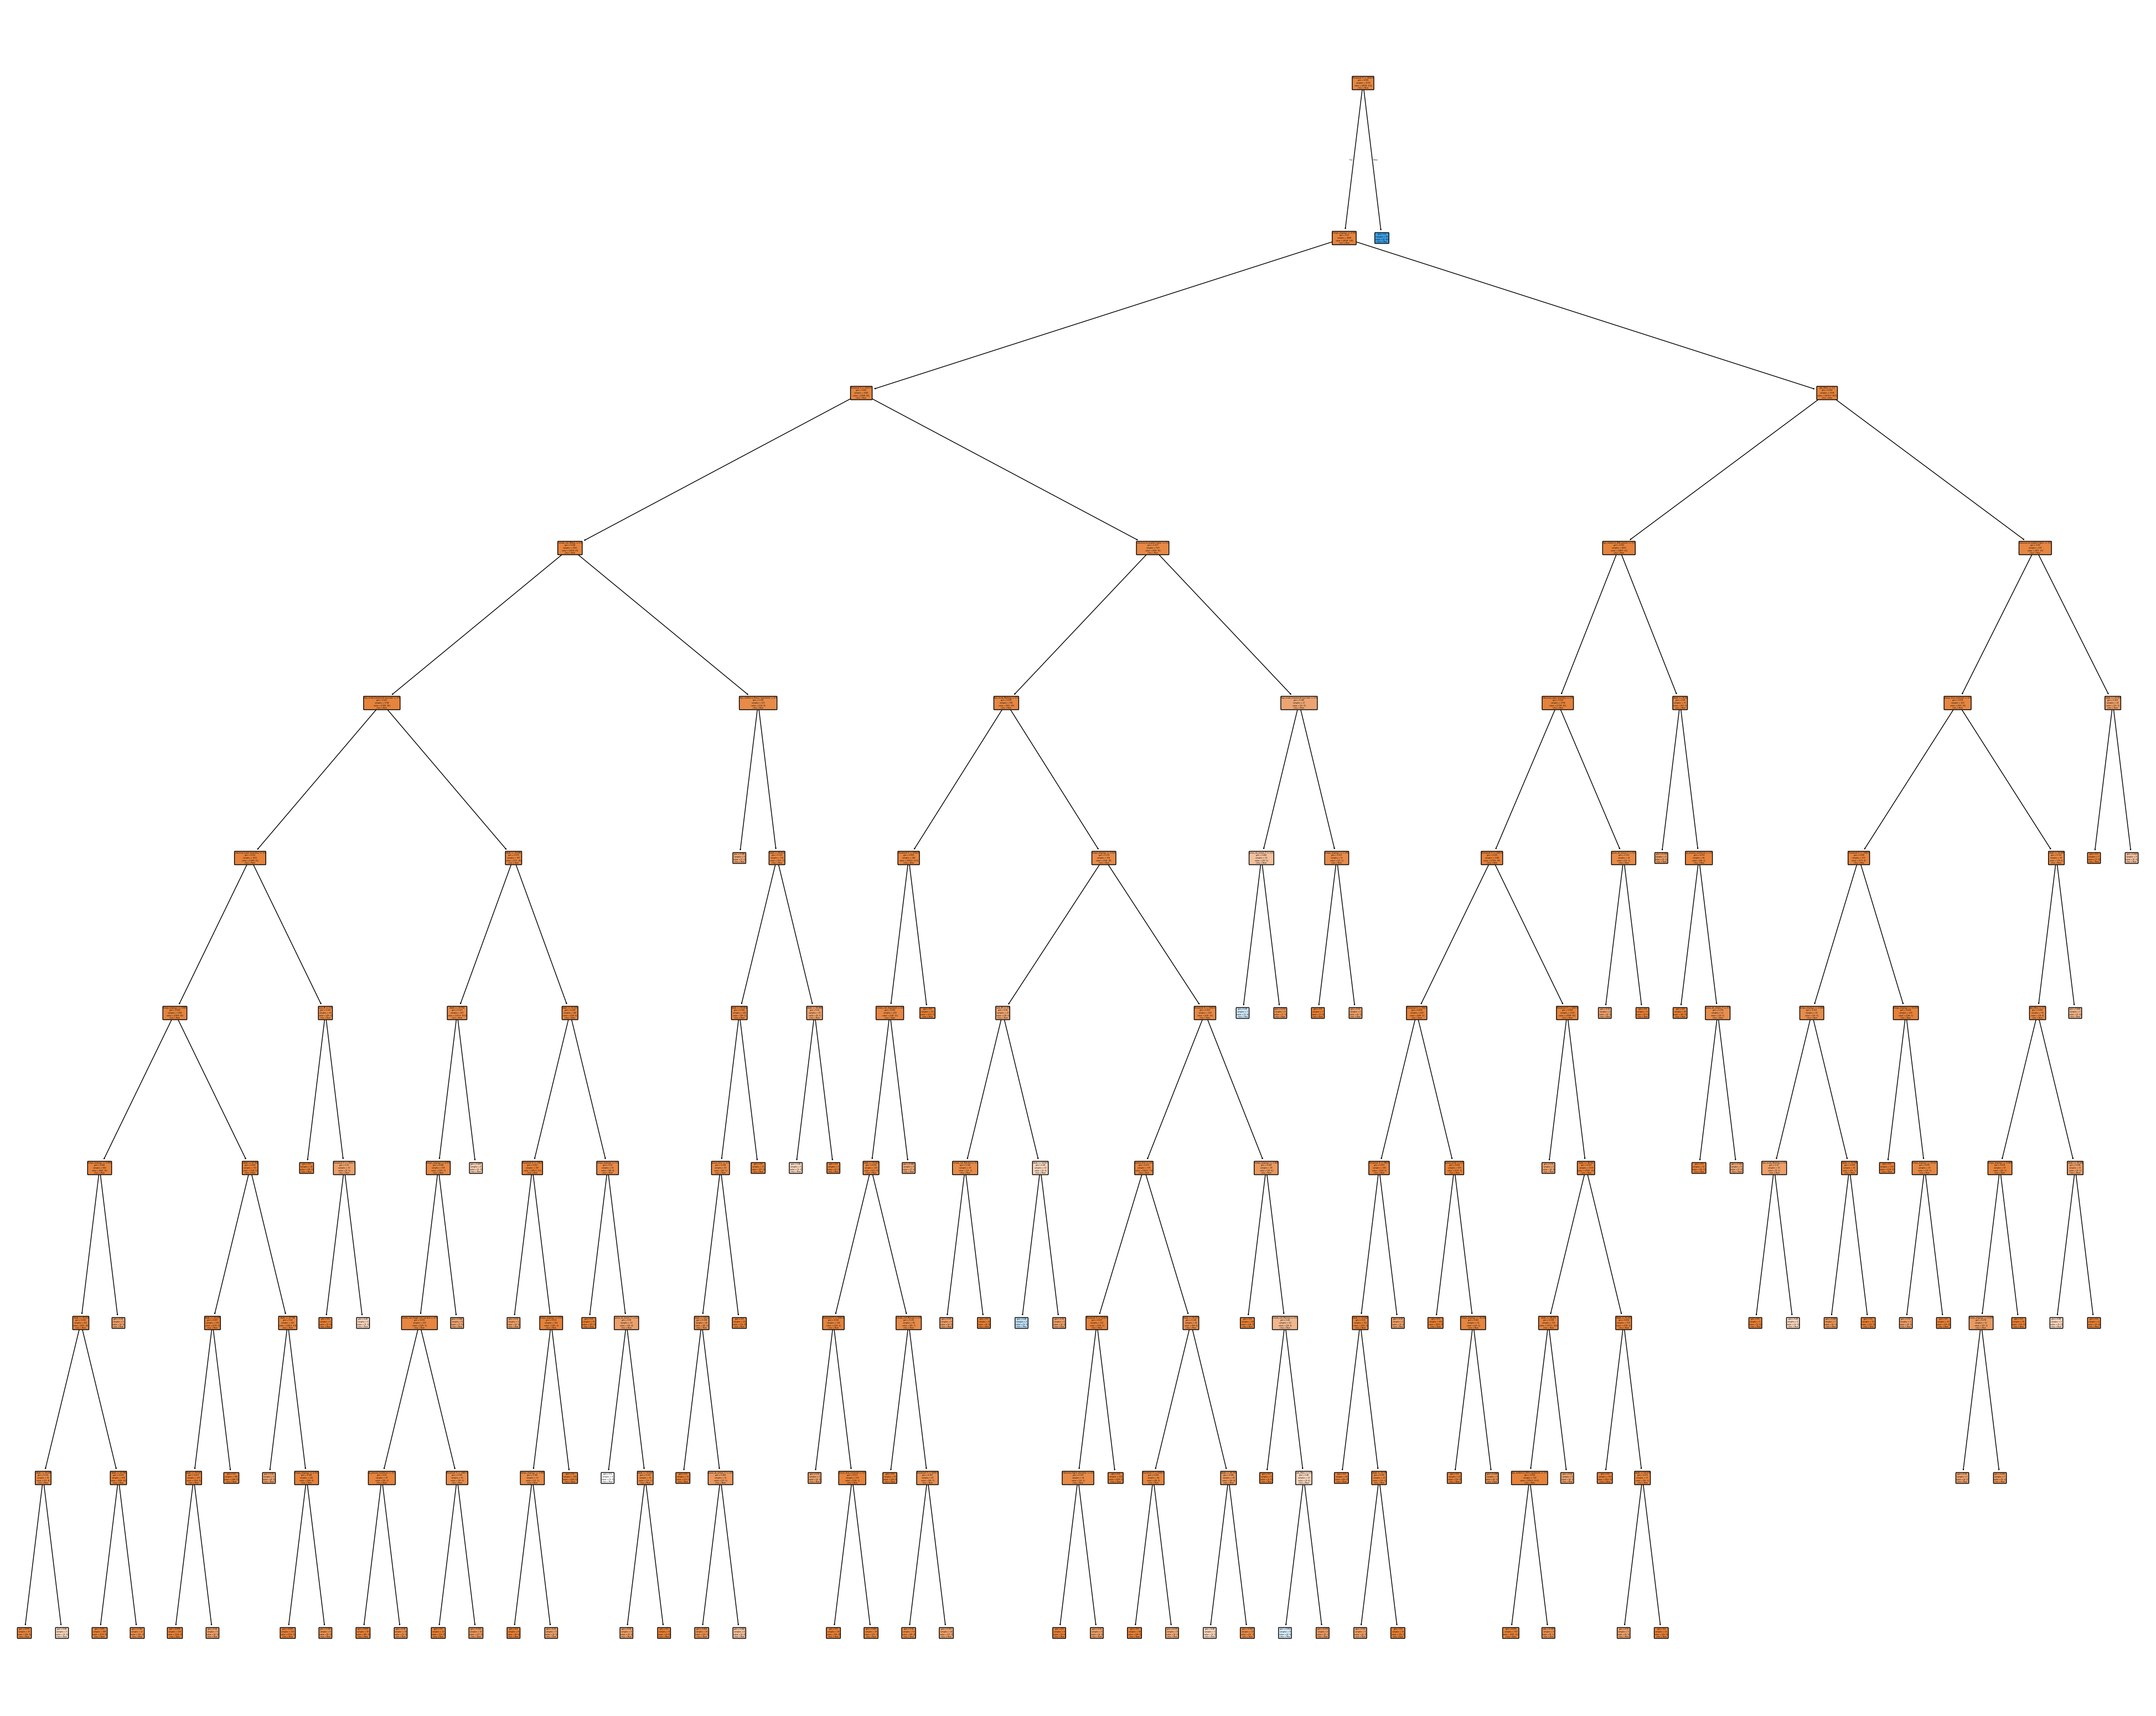

In [30]:
plt.figure(figsize=[50,40])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Bom', 'Mau'],
          feature_names=X_train.columns)

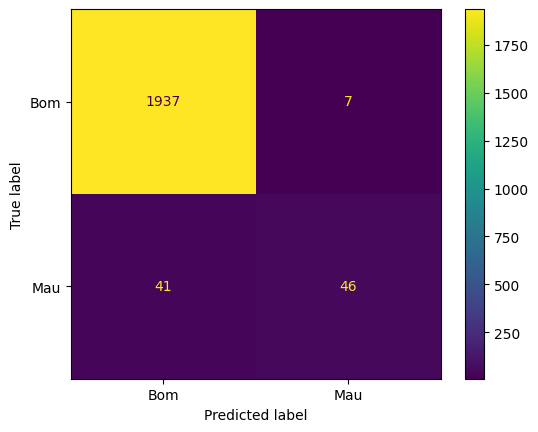

In [31]:
#Plotando da matrix de confusão para base de teste.

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Bom', 'Mau'])
plt.show()

In [32]:
X_test.shape

(2031, 33)

In [33]:
(1937+46)/2032

0.9758858267716536

In [34]:
(7+46)/2032

0.02608267716535433

A nova árvore teve uma acurácia ligeiramente maior, mesmo realizando as limitações.
Além disso, a proporção de pessoas classificadas como maus pagadores contínua bem baixa, pouco mais de 1%.


Caso todos os dados fossem classificados como "Bom", o modelo ainda teria uma acurácia muito elevada. Dado que o modelo erraria apenas pouco mais de 1%.

In [36]:
(41+7)/2032

0.023622047244094488